<a href="https://colab.research.google.com/github/CristinaMarsh/Data/blob/main/HMA/HMA_data_simpleversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/bruceraup/water_availability_fig.git

Cloning into 'water_availability_fig'...
remote: Enumerating objects: 49, done.
remote: Total 49 (delta 0), reused 0 (delta 0), pack-reused 49
Unpacking objects: 100% (49/49), 296.15 KiB | 3.29 MiB/s, done.


In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# mpl.style.use('ggplot')

In [5]:
melt_file = '/content/water_availability_fig/IN_fullbasin_meltcontributionstytype_500m.txt'
#precip_file = 'IN_v01_fullbasinmasks.MERRA_rainfall_km3.annual_mean.by_elev.txt'
precip_file = '/content/water_availability_fig/IN_v01_fullbasinmasks.MERRA_rain_snow_fall_km3.annual_mean.by_elev.v2.csv'

melt_df = pd.read_csv(melt_file, sep='\s+', \
                      names=['elev', 'exposed_glacier_ice', 'snow_on_ice', 'snow_on_land'], \
                      index_col='elev', skiprows=1)
print(melt_df)

prec_df = pd.read_csv(precip_file, sep=',', names=['elev', 'rain', 'snow'], index_col='elev', skiprows=1)
print(prec_df)

      exposed_glacier_ice  snow_on_ice  snow_on_land
elev                                                
0                0.000000     0.000000      0.000000
500              0.000000     0.000000      0.000000
1000             0.000000     0.000000      0.000362
1500             0.000000     0.000000      1.178719
2000             0.000000     0.000000     28.244779
2500             0.001341     0.004031     39.831208
3000             0.084324     0.158683     42.151725
3500             0.317704     0.585463     44.161797
4000             1.187601     4.210536     41.783655
4500             2.348431    10.559945     19.046297
5000             1.330488     7.204429      5.902753
5500             0.176473     1.483639      1.065484
6000             0.000988     0.014162      0.002371
6500             0.000000     0.000000      0.000000
7000             0.000000     0.000000      0.000000
7500             0.000000     0.000000      0.000000
8000             0.000000     0.000000      0.

In [6]:
melt_cum = melt_df.sort_index(ascending=False).cumsum()
prec_cum = prec_df.sort_index(ascending=False).cumsum()

print(melt_cum)
print(prec_cum)

      exposed_glacier_ice  snow_on_ice  snow_on_land
elev                                                
8500             0.000000     0.000000      0.000000
8000             0.000000     0.000000      0.000000
7500             0.000000     0.000000      0.000000
7000             0.000000     0.000000      0.000000
6500             0.000000     0.000000      0.000000
6000             0.000988     0.014162      0.002371
5500             0.177461     1.497801      1.067855
5000             1.507949     8.702230      6.970608
4500             3.856380    19.262175     26.016905
4000             5.043981    23.472711     67.800560
3500             5.361685    24.058174    111.962357
3000             5.446009    24.216857    154.114082
2500             5.447350    24.220888    193.945290
2000             5.447350    24.220888    222.190069
1500             5.447350    24.220888    223.368788
1000             5.447350    24.220888    223.369150
500              5.447350    24.220888    223.

In [7]:
all_contribs_model = pd.concat((melt_cum, prec_cum['rain']), axis=1)
all_contribs_merra = pd.concat((melt_cum['exposed_glacier_ice'], prec_cum), axis=1)

all_contribs_model = all_contribs_model[['exposed_glacier_ice', 'snow_on_ice', 'snow_on_land', 'rain']]
all_contribs_merra = all_contribs_merra[['exposed_glacier_ice', 'snow', 'rain']]

print(all_contribs_model)
print(all_contribs_merra)

        exposed_glacier_ice  snow_on_ice  snow_on_land        rain
elev                                                              
8500.0             0.000000     0.000000      0.000000    0.000000
8000.0             0.000000     0.000000      0.000000    0.000000
7500.0             0.000000     0.000000      0.000000    0.000000
7000.0             0.000000     0.000000      0.000000    0.000000
6500.0             0.000000     0.000000      0.000000    0.000000
6000.0             0.000988     0.014162      0.002371    0.008629
5500.0             0.177461     1.497801      1.067855    2.042264
5000.0             1.507949     8.702230      6.970608   10.199986
4500.0             3.856380    19.262175     26.016905   24.695214
4000.0             5.043981    23.472711     67.800560   38.383550
3500.0             5.361685    24.058174    111.962357   51.875879
3000.0             5.446009    24.216857    154.114082   66.653364
2500.0             5.447350    24.220888    193.945290   85.75

In [8]:
# Calculate contributions as fraction of total.  Drop all rows with all zeros first.

all_contribs_model = all_contribs_model[(all_contribs_model.T != 0).any()]        # drop zero rows
all_contribs_merra = all_contribs_merra[(all_contribs_merra.T != 0).any()]        # drop zero rows

sums_model = all_contribs_model.sum(axis=1)
sums_merra = all_contribs_merra.sum(axis=1)
print("SUMS, MODEL\n", sums_model)
print("SUMS, MERRA\n", sums_merra)
all_contribs_model_fraction = all_contribs_model.divide(sums_model.values, axis='index')
all_contribs_model_fraction.index.name = 'Elevation (m)'
all_contribs_merra_fraction = all_contribs_merra.divide(sums_merra.values, axis='index')
all_contribs_merra_fraction.index.name = 'Elevation (m)'

print("FRACTIONS, MODEL")
print(all_contribs_model_fraction)
print("FRACTIONS, MERRA")
print(all_contribs_merra_fraction)

SUMS, MODEL
 elev
6000.0      0.026150
5500.0      4.785381
5000.0     27.380773
4500.0     73.830674
4000.0    134.700802
3500.0    193.258095
3000.0    250.430312
2500.0    309.367799
2000.0    364.844114
1500.0    398.537233
1000.0    426.538552
500.0     454.871667
0.0       543.544252
dtype: float64
SUMS, MERRA
 elev
7500.0      0.006964
7000.0      0.079507
6500.0      0.366829
6000.0      1.970131
5500.0     14.645097
5000.0     44.610113
4500.0     85.737994
4000.0    121.686395
3500.0    149.138856
3000.0    172.475866
2500.0    196.140721
2000.0    224.702793
1500.0    257.317629
1000.0    285.321079
500.0     313.654193
0.0       402.326779
dtype: float64
FRACTIONS, MODEL
               exposed_glacier_ice  snow_on_ice  snow_on_land      rain
Elevation (m)                                                          
6000.0                    0.037783     0.541577      0.090671  0.329970
5500.0                    0.037084     0.312995      0.223149  0.426771
5000.0              

In [9]:
all_contribs_model_fraction.sum(axis=1)
all_contribs_merra_fraction.sum(axis=1)

Elevation (m)
7500.0    1.0
7000.0    1.0
6500.0    1.0
6000.0    1.0
5500.0    1.0
5000.0    1.0
4500.0    1.0
4000.0    1.0
3500.0    1.0
3000.0    1.0
2500.0    1.0
2000.0    1.0
1500.0    1.0
1000.0    1.0
500.0     1.0
0.0       1.0
dtype: float64

In [10]:
colors_model = ['r', 'blue', 'cyan', 'gray']
colors_merra = ['r', 'cyan', 'gray']

Text(0, 0.5, 'Fractional stream contribution')

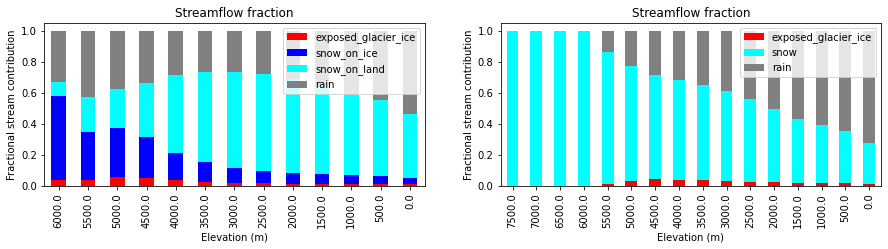

In [11]:
fig1, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,3))

ax = all_contribs_model_fraction.plot.bar(ax=ax1, title='Streamflow fraction', color=colors_model, stacked=True)
ax.set_ylabel('Fractional stream contribution')
ax = all_contribs_merra_fraction.plot.bar(ax=ax2, title='Streamflow fraction', color=colors_merra, stacked=True)
ax.set_ylabel('Fractional stream contribution')

Text(0, 0.5, 'Stream contribution (km$^3$)')

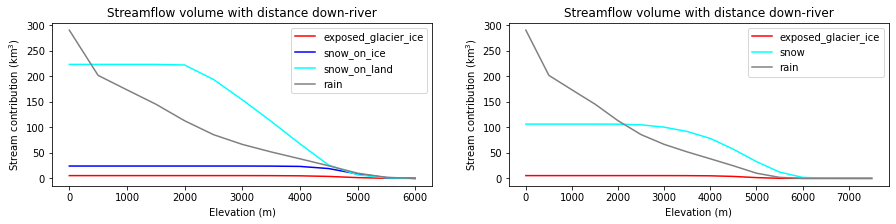

In [12]:
fig1, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,3))
ax = all_contribs_model.plot(ax=ax1, title='Streamflow volume with distance down-river', color=colors_model)
ax.set_ylabel(r'Stream contribution (km$^3$)')
ax = all_contribs_merra.plot(ax=ax2, title='Streamflow volume with distance down-river', color=colors_merra)
ax.set_ylabel(r'Stream contribution (km$^3$)')

In [13]:
# Plot modeled snow_on_land+snow_on_ice vs merra snow
model_snows = all_contribs_model['snow_on_land'] + all_contribs_model['snow_on_ice']
print("MODEL\n", model_snows)

MODEL
 Elevation (m)
6000.0      0.016533
5500.0      2.565656
5000.0     15.672838
4500.0     45.279080
4000.0     91.273271
3500.0    136.020531
3000.0    178.330939
2500.0    218.166178
2000.0    246.410957
1500.0    247.589676
1000.0    247.590038
500.0     247.590038
0.0       247.590038
dtype: float64


In [14]:
merra_snow = all_contribs_merra['snow']
merra_snow = merra_snow[merra_snow.index <= 6000]

print("MERRA\n", merra_snow)

MERRA
 Elevation (m)
6000.0      1.960514
5500.0     12.425371
5000.0     32.902179
4500.0     57.186400
4000.0     78.258864
3500.0     91.901293
3000.0    100.376493
2500.0    104.939100
2000.0    106.269636
1500.0    106.370071
1000.0    106.372564
500.0     106.372564
0.0       106.372564
Name: snow, dtype: float64


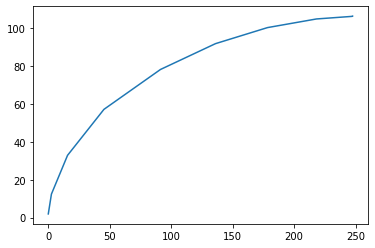

In [15]:

plt.plot(model_snows, merra_snow)

In [16]:
snows_both = pd.concat((model_snows, merra_snow), axis=1)
snows_both.columns = ['sol+soi', 'merra_snow']
print(snows_both)

                  sol+soi  merra_snow
Elevation (m)                        
6000.0           0.016533    1.960514
5500.0           2.565656   12.425371
5000.0          15.672838   32.902179
4500.0          45.279080   57.186400
4000.0          91.273271   78.258864
3500.0         136.020531   91.901293
3000.0         178.330939  100.376493
2500.0         218.166178  104.939100
2000.0         246.410957  106.269636
1500.0         247.589676  106.370071
1000.0         247.590038  106.372564
500.0          247.590038  106.372564
0.0            247.590038  106.372564


<AxesSubplot:xlabel='Elevation (m)'>

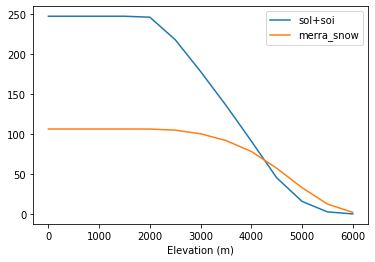

In [17]:
snows_both.plot()

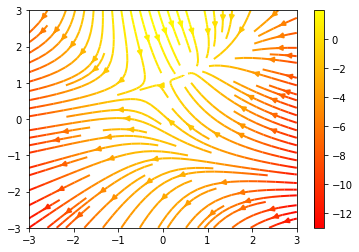

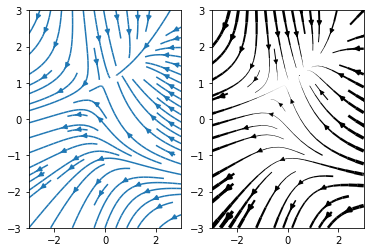

In [18]:
"""
Demo of the `streamplot` function.

A streamplot, or streamline plot, is used to display 2D vector fields. This
example shows a few features of the stream plot function:

    * Varying the color along a streamline.
    * Varying the density of streamlines.
    * Varying the line width along a stream line.
"""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn)
fig0.colorbar(strm.lines)

fig1, (ax1, ax2) = plt.subplots(ncols=2)
ax1.streamplot(X, Y, U, V, density=[0.5, 1])

lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)

#plt.show()

In [26]:
! git clone https://github.com/xinluo2018/High-Moutain-Asia-GIS-Data.git

Cloning into 'High-Moutain-Asia-GIS-Data'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 124 (delta 12), reused 41 (delta 11), pack-reused 80
Receiving objects: 100% (124/124), 75.41 MiB | 13.42 MiB/s, done.
Resolving deltas: 100% (40/40), done.
Updating files: 100% (42/42), done.


In [27]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!apt-get install libgdal-dev
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (7.2.1-1~focal0).
libproj-dev set to manually installed.
proj-data is already the newest version (7.2.1-1~focal0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 170 kB of archives.
After this operation, 485 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal/main amd64 proj-bin amd64 7.2.1-1~focal0 [170 kB]
Fetched 170 kB in 1s (336 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 128275 files and directories currently installed.)
Preparing to unpack .../proj-bin_7.2.1-1~focal0_amd64.deb ...
Unpacking proj-bin (7.2.1-1~focal0) ...
Setting up proj-bin (7.2.1-1~focal0) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists... Done
Building

In [29]:
!apt-get install libspatialindex-dev
!apt-get install gdal-bin

!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 340 kB of archives.
After this operation, 1,538 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex6 amd64 1.9.3-1build1 [266 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex-c6 amd64 1.9.3-1build1 [58.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libspatialindex-dev amd64 1.9.3-1build1 [16.0 kB]
Fetched 340 kB in 1s (448 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 128300 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-1b

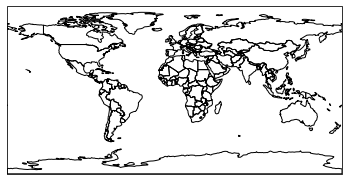

In [3]:
# Test
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(world['geometry'], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black')

plt.show()

In [4]:
import os
import warnings
warnings.filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.pyplot as plt
import geopandas as gpd

In [5]:
import os
root_proj = '/content/High-Moutain-Asia-GIS-Data' ### your repo directory
os.chdir(root_proj)

In [6]:
path_basins_vörösmarty2010 = 'basins/asia_Vörösmarty2010_6min.gpkg' 
path_basins_lehner2013 = 'basins/asia_Lehner2013_levels/hybas_as_lev03_v1c.gpkg'  ### HydroSHEDS dataset
path_tb_new2021 = 'extents/TPlateau/TPBoundary_new2021.gpkg'

In [ ]:
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size':15})

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mercator())

ax.set_extent([50.0, 125.0, 8.0, 47.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
fea_basins_vörösmarty2010 = cfeature.ShapelyFeature(Reader(path_basins_vörösmarty2010).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='Blue', alpha=0.8,\
                            linestyle='-', linewidth=1, facecolor='none')
fea_basins_lehner2013 = cfeature.ShapelyFeature(Reader(path_basins_lehner2013).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='green', alpha=0.8,\
                            linestyle='-', linewidth=1, facecolor='none')
fea_tp_extent = cfeature.ShapelyFeature(Reader(path_tb_new2021).geometries(),\
                            crs=ccrs.PlateCarree(), edgecolor='red', alpha=0.8,\
                            linestyle='-', linewidth=2, facecolor='none')

ax.add_feature(fea_basins_vörösmarty2010, zorder=2)
ax.add_feature(fea_basins_lehner2013, zorder=2)
ax.add_feature(fea_tp_extent, zorder=2)
ax.stock_img(); ax.coastlines()